# PCA "Eigenfaces" demo

Notebook from [Eric Elmoznino](https://github.com/EricElmoznino/lighthouse_dimensionality_reduction_tutorial).

Approach described in Sirovich and Kirby (1987)

Dataset shape: (1348, 2914)


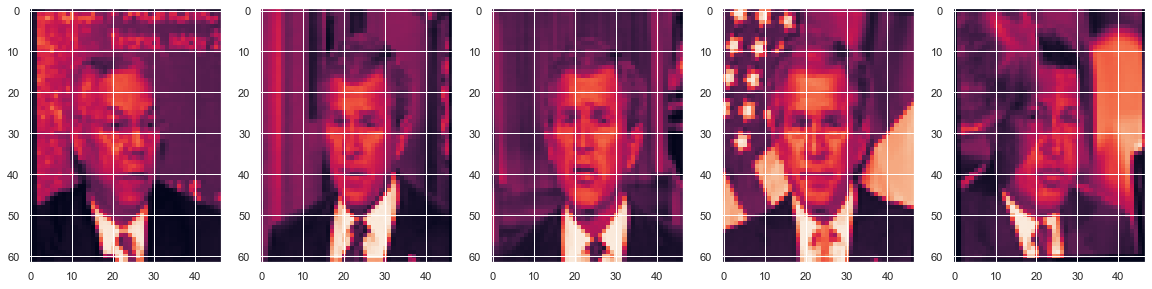

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import the LFW people image dataset from skleaern
faces = fetch_lfw_people(min_faces_per_person=60).data
print('Dataset shape: {}'.format(faces.shape))

# Show the first 5 faces in the dataset
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(faces[i].reshape((62, 47))) #62x47 = 2914 features (contains grayscale value)

In [2]:
from sklearn.decomposition import PCA

# Find the first 75 principle components of the dataset
pca = PCA(n_components=75)
#pca = PCA()
pca.fit(faces)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(faces)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (1348, 75)


Text(0, 0.5, '% Cumulative explained variance')

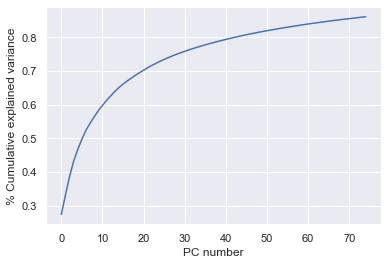

In [3]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

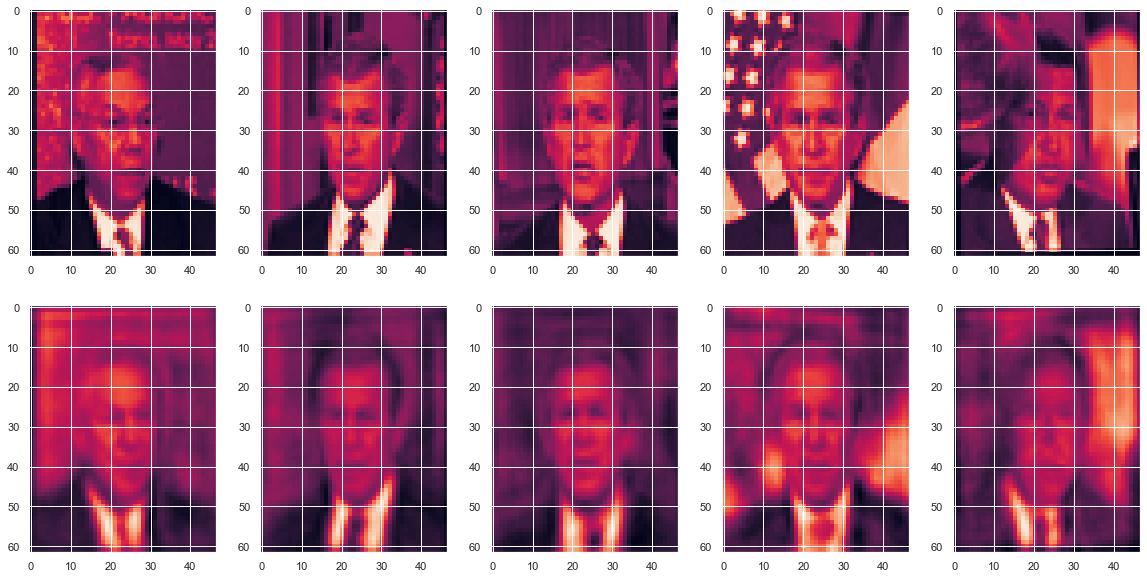

In [4]:
# See how much information the PCs preserve
reconstructed_faces = pca.inverse_transform(reduced_faces)

# Show the first 5 faces in the dataset and their reconstructions
_, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    axes[0, i].imshow(faces[i].reshape((62, 47)))
    axes[1, i].imshow(reconstructed_faces[i].reshape((62, 47)))

PC matrix shape: (75, 2914)


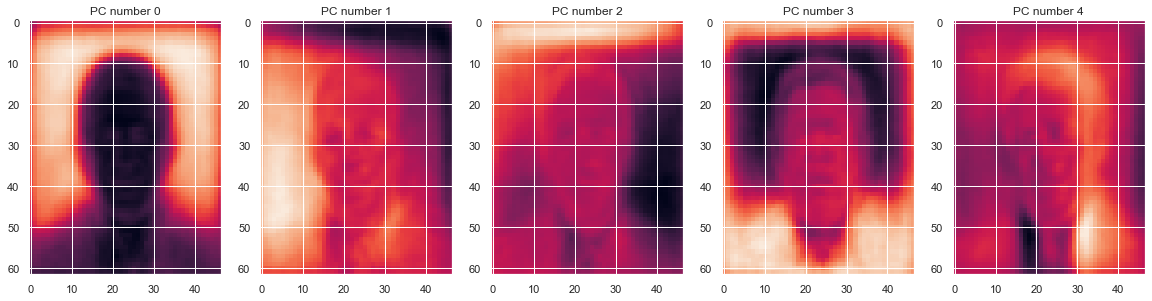

In [5]:
# Get the actual PCs from the sklearn PCA model
pcs = pca.components_
print('PC matrix shape: {}'.format(pcs.shape))

# Inspect the first 5 PCs
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(pcs[i].reshape((62, 47)))
    ax.set_title('PC number {}'.format(i))

### Our original features were image pixels. Our low-dimensional features (PCs) correspond to... face-related concepts!
This helps us learn what the important factors that describe faces (and how they primarily vary).

For example, individual PCs might correspond to:
- wide vs. narrow face
- eyes closed/open
- smiling/not smiling
- etc.

# Take-home exercise
Try and find out what PC 1 represents by finding images that have high values along it and other images that have low ones. Often, just inspecting the polarity of the PC can tell you what it does.